In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import globalsettings as gs

In [2]:
# Cargando el archivo .npz
data_npz = np.load(gs.the_files.DATA_LIGHTWEIGHT)

# Obtener los nombres de los arrays
array_names = data_npz.files
array_names


['media_data', 'extra_features', 'costs']

In [3]:
# Cargando los arrays en variables con los mismos nombres
media_data = data_npz['media_data']
extra_features = data_npz['extra_features']
costs = data_npz['costs']

# Verificando las dimensiones de los arrays cargados
media_data.shape, extra_features.shape, costs.shape


((160, 3, 5), (160, 2, 5), (3,))

In [4]:
media_data_2d = media_data.reshape(160, -1)

# Supongamos que estos son los valores para 'media_channel' y 'geo'
media_channels = ['channel1', 'channel2', 'channel3']
geos = ['geo1', 'geo2', 'geo3', 'geo4', 'geo5']

# Crea las columnas basadas en las combinaciones de 'media_channel' y 'geo'
columns = [f'{channel}_{geo}' for channel in media_channels for geo in geos]

# Crea el DataFrame
df_wide = pd.DataFrame(media_data_2d, columns=columns, index = pd.date_range(start='2022-01-03', periods=160, freq='W-MON'))

df_wide.head()

,channel1_geo1,channel1_geo2,channel1_geo3,channel1_geo4,channel1_geo5,channel2_geo1,channel2_geo2,channel2_geo3,channel2_geo4,channel2_geo5,channel3_geo1,channel3_geo2,channel3_geo3,channel3_geo4,channel3_geo5
2022-01-03,20.309933,20.309933,20.309933,20.309933,20.309933,21.495794,21.495794,21.495794,21.495794,21.495794,23.264574,23.264574,23.264574,23.264574,23.264574
2022-01-10,20.574215,20.574215,20.574215,20.574215,20.574215,19.579594,19.579594,19.579594,19.579594,19.579594,21.324257,21.324257,21.324257,21.324257,21.324257
2022-01-17,18.423088,18.423088,18.423088,18.423088,18.423088,22.889912,22.889912,22.889912,22.889912,22.889912,20.188976,20.188976,20.188976,20.188976,20.188976
2022-01-24,19.161734,19.161734,19.161734,19.161734,19.161734,20.355442,20.355442,20.355442,20.355442,20.355442,20.265499,20.265499,20.265499,20.265499,20.265499
2022-01-31,20.657064,20.657064,20.657064,20.657064,20.657064,21.434008,21.434008,21.434008,21.434008,21.434008,21.574446,21.574446,21.574446,21.574446,21.574446


In [5]:
# Convirtiendo el DataFrame de formato ancho a formato largo
df_long = df_wide.reset_index().melt(id_vars='index', value_vars=columns, var_name='media_geo', value_name='value')

# Separando las columnas 'media_channel' y 'geo' a partir de la columna 'media_geo'
df_long[['media_channel', 'geo']] = df_long['media_geo'].str.split('_', expand=True)

# Renombrando la columna 'index' a 'date'
df_long.rename(columns={'index': 'date'}, inplace=True)

# Eliminando la columna 'media_geo' ya que ya hemos extraído la información en 'media_channel' y 'geo'
df_long.drop(columns=['media_geo'], inplace=True)

# Reordenando las columnas
df_long = df_long[['date', 'media_channel', 'geo', 'value']]

# Mostrando las primeras filas del DataFrame en formato largo
df_long.head()


,date,media_channel,geo,value
0,2022-01-03,channel1,geo1,20.309933
1,2022-01-10,channel1,geo1,20.574215
2,2022-01-17,channel1,geo1,18.423088
3,2022-01-24,channel1,geo1,19.161734
4,2022-01-31,channel1,geo1,20.657064


In [6]:
df_long.to_csv(gs.the_files.MEDIA_LONG, index = False)

In [7]:
# Reshape del array 3D a 2D (160, 2, 5) -> (160, 2 * 5)
extra_features_2d = extra_features.reshape(160, -1)

# Ajustando las características de acuerdo con la forma real del array
features = ['feature1', 'feature2']

# Creando las columnas basadas en las combinaciones de 'feature' y 'geo'
columns_extra = [f'{feature}_{geo}' for feature in features for geo in geos]

# Creando el DataFrame con formato ancho
df_extra_wide = pd.DataFrame(extra_features_2d, columns=columns_extra,
                             index=pd.date_range(start='2022-01-03', periods=160, freq='W-MON'))

# Convirtiendo el DataFrame de formato ancho a formato largo
df_extra_long = df_extra_wide.reset_index().melt(id_vars='index', value_vars=columns_extra, var_name='feature_geo', value_name='value')

# Separando las columnas 'feature' y 'geo' a partir de la columna 'feature_geo'
df_extra_long[['feature', 'geo']] = df_extra_long['feature_geo'].str.split('_', expand=True)

# Renombrando la columna 'index' a 'date'
df_extra_long.rename(columns={'index': 'date'}, inplace=True)

# Eliminando la columna 'feature_geo' ya que ya hemos extraído la información en 'feature' y 'geo'
df_extra_long.drop(columns=['feature_geo'], inplace=True)

# Reordenando las columnas
df_extra_long = df_extra_long[['date', 'feature', 'geo', 'value']]

# Mostrando las primeras filas del DataFrame en formato largo
df_extra_long.head()


,date,feature,geo,value
0,2022-01-03,feature1,geo1,4.242858
1,2022-01-10,feature1,geo1,4.760330
2,2022-01-17,feature1,geo1,5.610206
3,2022-01-24,feature1,geo1,6.484605
4,2022-01-31,feature1,geo1,4.094253


In [8]:
df_extra_long.to_csv(gs.the_files.EXTRA_LONG, index = False)

# Selección

1. Indexación Básica

Puedes acceder a un elemento específico en un array utilizando índices. Los índices comienzan en 0.

In [9]:
# Ejemplo de un Array 1D:

arr_1d = np.array([10, 20, 30, 40, 50])
element = arr_1d[2]  # Selecciona el tercer elemento

In [10]:
# Ejemplo de un Array 2D:

arr_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
element = arr_2d[1, 2]  # Selecciona el tercer elemento de la segunda fila



2. Slicing

Puedes seleccionar una sección (rebanada) del array utilizando el operador de slicing :.

In [11]:
sliced_row = arr_2d[1, :]  # Selecciona toda la segunda fila
sliced_column = arr_2d[:, 1]  # Selecciona toda la segunda columna


3. Indexación Booleana

Puedes utilizar una condición para seleccionar elementos que cumplan ciertos criterios.

In [12]:
arr = np.array([1, 2, 3, 4, 5])
selected = arr[arr > 3]  # Selecciona elementos mayores que 3


4. Indexación de Matrices (Fancy Indexing)

Puedes utilizar listas o arrays de índices para seleccionar elementos específicos.

In [13]:
arr = np.array([10, 20, 30, 40, 50])
indices = [1, 3]
selected = arr[indices]  # Selecciona los elementos en las posiciones 1 y 3

# Operaciones

## Operaciones aritméticas

Puedes realizar operaciones aritméticas elementales entre arrays del mismo tamaño. Esto incluye suma (+), resta (-), multiplicación (*), división (/), y potenciación (**).

In [14]:
import numpy as np

# Creando dos arrays numpy
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Suma
c = a + b
# Resultado: array([5, 7, 9])


## Operaciones matemáticas

NumPy ofrece funciones matemáticas como sin, cos, exp, etc. Estas funciones se aplican elemento por elemento en el array.

In [15]:
# Creando un array numpy
a = np.array([1, 2, 3])

# Función exponencial
b = np.exp(a)
# Resultado: array([ 2.71828183,  7.3890561 , 20.08553692])


## Operaciones de álgebra lineal

NumPy ofrece varias funciones en el submódulo numpy.linalg para realizar operaciones de álgebra lineal, como cálculo de determinantes, resolución de sistemas lineales, cálculo de autovalores y autovectores, etc.

In [16]:
# Creando dos arrays 2D
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])

# Producto de matrices
c = np.dot(a, b)
# Resultado: array([[19, 22], [43, 50]])


In [6]:
# Definiendo vectores y matrices
v1 = np.array([1, 2])
v2 = np.array([3, 4])
m1 = np.array([[1, 2], [3, 4]])
m2 = np.array([[5, 6], [7, 8]])

# Producto punto entre vectores
print("Producto punto:", np.dot(v1, v2))

# Multiplicación elemento a elemento
print("Elemento a elemento:", np.multiply(v1, v2))
print("Elemento a elemento:", v1 * v2)

# Producto matricial
print("Producto matricial:", np.dot(m1, m2))
print("Producto matricial:", m1 @ m2)

# Multiplicación elemento a elemento de matrices
print("Multiplicación elemento a elemento:", m1 * m2)
print("Multiplicación elemento a elemento:", np.multiply(m1, m2))


Producto punto: 11
Elemento a elemento: [3 8]
Elemento a elemento: [3 8]
Producto matricial: [[19 22]
 [43 50]]
Producto matricial: [[19 22]
 [43 50]]
Multiplicación elemento a elemento: [[ 5 12]
 [21 32]]
Multiplicación elemento a elemento: [[ 5 12]
 [21 32]]


`np.dot` (Producto Punto o Matricial)
* Para 1D (Vectores): Calcula el producto punto.
* Para 2D (Matrices): Realiza el producto matricial.
* Para N-D (Arrays N-dimensionales): Realiza la suma de productos sobre el último eje del primer array y el penúltimo del segundo.

`np.multiply` o `*` (Multiplicación Elemento a Elemento)
* Uso General: Realiza la multiplicación elemento a elemento, adecuada para arrays de cualquier dimensión.
* Regla Importante: Las dimensiones de los arrays deben ser compatibles según las reglas de broadcasting de NumPy.

`@` (Operador de Producto Matricial)
* Para 2D (Matrices): Es igual al producto matricial.
* Para N-D: Realiza la multiplicación de matrices a lo largo de los últimos dos ejes.


In [7]:
# Arrays de diferentes dimensiones
a = np.array([1, 2, 3])
b = np.array([[4, 5, 6], [7, 8, 9]])

# Producto punto entre vectores (1D)
print("Producto punto (vectores):", np.dot(a, a))

# Producto matricial (2D)
print("Producto matricial:", np.dot(b, b.T))  # T es la transposición
print("Producto matricial:", b @ b.T)  # T es la transposición

# Multiplicación elemento a elemento
print("Multiplicación elemento a elemento:", a * a)
print("Multiplicación elemento a elemento:", np.multiply(a, a))

# Broadcasting en acción
print("Broadcasting:", a * b)


Producto punto (vectores): 14
Producto matricial: [[ 77 122]
 [122 194]]
Producto matricial: [[ 77 122]
 [122 194]]
Multiplicación elemento a elemento: [1 4 9]
Multiplicación elemento a elemento: [1 4 9]
Broadcasting: [[ 4 10 18]
 [ 7 16 27]]


Definamos dos arrays 3D:

* A de tamaño 2×3×4: 2 matrices de 3×4.
* B de tamaño 2×4×2: 2 matrices de 4×2.

In [8]:
A = np.random.randint(10, size=(2, 3, 4))
B = np.random.randint(10, size=(2, 4, 2))

# Usando np.dot en arrays 3D
C = np.dot(A, B)

print("Resultado de np.dot(A, B):")
print(C)
print("Forma de C:", C.shape)


Resultado de np.dot(A, B):
[[[[100 112]
   [ 70  73]]

  [[123 152]
   [ 47 121]]

  [[ 65  69]
   [ 22  37]]]


 [[[107 155]
   [ 50 100]]

  [[ 60  78]
   [ 61  27]]

  [[ 99 122]
   [ 51  53]]]]
Forma de C: (2, 3, 2, 2)


Explicación:

El resultado de np.dot(A, B) no es de tamaño 2×3×2, sino de tamaño 2×3×2×2. 

Esto se debe a que np.dot suma sobre el último eje de A y el penúltimo de B, pero conserva las otras dimensiones.

In [9]:
# Usando @ en arrays 3D
C_at = A @ B

print("Resultado de A @ B:")
print(C_at)
print("Forma de C_at:", C_at.shape)


Resultado de A @ B:
[[[100 112]
  [123 152]
  [ 65  69]]

 [[ 50 100]
  [ 61  27]
  [ 51  53]]]
Forma de C_at: (2, 3, 2)


+ A @ B realiza una operación similar a múltiples productos matriciales, operando sobre los últimos dos ejes.
+ El resultado C_at será un array de forma 2×3×2, igual que con np.dot.

## Operaciones estadísticas

NumPy también ofrece funciones para calcular estadísticas de los datos en arrays, como min, max, sum, mean, median, std, etc

In [17]:
# Creando un array numpy
a = np.array([1, 2, 3, 4, 5])

# Media de los elementos del array
m = np.mean(a)
# Resultado: 3.0


## Operaciones booleanas

Puedes aplicar operaciones booleanas elemento por elemento en arrays. Esto es útil para la indexación booleana y la selección condicional de elementos.

In [18]:
# Creando un array numpy
a = np.array([1, 2, 3, 4, 5])

# Creando una máscara booleana para valores mayores que 3
mask = a > 3
# Resultado: array([False, False, False,  True,  True])


# Broadcasting

Cuando los arrays en una operación no tienen las mismas dimensiones, NumPy intenta aplicar "broadcasting" para hacer que las dimensiones sean compatibles. El broadcasting es un potente mecanismo que permite que NumPy trabaje con arrays de diferentes formas cuando se realizan operaciones aritméticas.

Aquí están las reglas del broadcasting:

+ Regla 1: Si los dos arrays difieren en su número de dimensiones, la forma del que tiene menos dimensiones se rellena con unos en su lado izquierdo.
+ Regla 2: Si la forma de los dos arrays no coincide en alguna dimensión, el array con forma igual a 1 en esa dimensión se estira para coincidir con la otra forma.
+ Regla 3: Si en cualquier dimensión los tamaños difieren y ninguno es igual a 1, se genera un error.

In [19]:
import numpy as np

a = np.array([1, 2, 3]) # Forma (3,)
b = np.array([[10], [20], [30]]) # Forma (3, 1)

# a se estira a (3, 3) y b se estira a (3, 3)
c = a + b
# Resultado:
# array([[11, 12, 13],
#        [21, 22, 23],
#        [31, 32, 33]])


# Equivalencias con R

apply, sweep, aperm

apply 

La función apply en R es utilizada para aplicar una función a los márgenes de una matriz o array. En NumPy, puedes lograr un comportamiento similar utilizando la función np.apply_along_axis.

La función np.apply_along_axis aplica una función a lo largo del eje especificado de un array. La función toma tres argumentos principales: la función que quieres aplicar, el eje a lo largo del cual quieres aplicar la función, y el array en sí.

Aquí tienes un ejemplo que muestra cómo puedes usar np.apply_along_axis para replicar el comportamiento de apply en R:

In [20]:
import numpy as np

# Definiendo una función que quieres aplicar
def my_function(x):
    return x.mean()

# Creando un array 2D
array = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

# Aplicando la función a lo largo del eje 0 (columnas)
result_along_axis0 = np.apply_along_axis(my_function, axis=0, arr=array)
# Resultado: array([4., 5., 6.])

# Aplicando la función a lo largo del eje 1 (filas)
result_along_axis1 = np.apply_along_axis(my_function, axis=1, arr=array)
# Resultado: array([2., 5., 8.])


# Random y distribuciones

En NumPy, puedes establecer la semilla para la generación de números aleatorios utilizando numpy.random.seed(). Esta función asegura que los resultados aleatorios sean reproducibles. Es equivalente al set.seed() de R.

In [ ]:
np.random.seed(42)

Después de establecer la semilla, cualquier función que utilice la generación de números aleatorios de NumPy producirá los mismos resultados cada vez que se ejecute, siempre que se inicie con la misma semilla.

In [33]:
np.random.seed(42)
print(np.random.rand(5))  # Genera 5 números aleatorios entre 0 y 1

[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]


1. Generación Básica de Números Aleatorios

a. Números Aleatorios Uniformes

Para generar números aleatorios entre 0 y 1 (distribución uniforme):

In [35]:
np.random.seed(42)
np.random.rand(5)  # Genera 5 números aleatorios entre 0 y 1

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864])

b. Números Aleatorios Enteros

Equivalente a sample en R, puedes usar `np.random.choice` o `np.random.randint`:

In [36]:
np.random.choice(10, 5)  # Elige 5 números aleatorios entre 0 y 9
np.random.randint(0, 10, 5)  # Genera 5 números aleatorios entre 0 (inclusive) y 10 (exclusivo)


array([7, 7, 2, 5, 4])

2. Generación de Números Aleatorios de Distribuciones Estadísticas

NumPy proporciona funciones para generar números aleatorios de muchas distribuciones estadísticas comunes:

a. Distribución Normal (Gaussiana)

In [37]:
np.random.randn(5)  # 5 números aleatorios de una distribución normal estándar (media=0, desviación estándar=1)
np.random.normal(loc=0, scale=1, size=5)  # Especificando media (loc) y desviación estándar (scale)


array([ 0.95036968,  0.81644508, -1.523876  , -0.42804606, -0.74240684])

b. Distribución Binomial

In [38]:
n, p = 10, 0.5
np.random.binomial(n, p, 5)  # 5 números aleatorios de una distribución binomial con n intentos y probabilidad p

array([4, 5, 6, 4, 5])

c. Distribución Poisson

In [39]:
lambda_p = 3
np.random.poisson(lambda_p, 5)  # 5 números aleatorios de una distribución Poisson con lambda lambda_p


array([1, 2, 4, 2, 1])

d. Distribución Exponencial

In [40]:
scale = 1.0
np.random.exponential(scale, 5)  # 5 números aleatorios de una distribución exponencial


array([2.40042289, 0.29945778, 1.0862558 , 0.37354658, 0.7341109 ])

... y muchas otras distribuciones (gamma, beta, chi cuadrado, etc.)

3. Permutaciones y Mezcla de Arrays

a. Mezcla de Arrays (Shuffle)

In [41]:
arr = np.arange(10)
np.random.shuffle(arr)  # Mezcla el array en su lugar


b. Permutación de Arrays

In [42]:
arr = np.arange(10)
permuted_arr = np.random.permutation(arr)  # Devuelve un array permutado


# Ejemplo

In [21]:
# Cargando el primer archivo: "lightweight_data.npz"
import numpy as np

# Cargando el archivo
lightweight_data = np.load(gs.the_files.DATA_LIGHTWEIGHT)

# Obteniendo los nombres de los arrays dentro del archivo
lightweight_data_files = lightweight_data.files
lightweight_data_files


['media_data', 'extra_features', 'costs']

In [22]:
# Cargando el segundo archivo: "lightweight_traze.npz"
lightweight_traze = np.load(gs.the_files.TRAZE_LIGHTWEIGHT)

# Obteniendo los nombres de los arrays dentro del archivo
lightweight_traze_files = lightweight_traze.files
lightweight_traze_files


['channel_coef_media',
 'coef_extra_features',
 'coef_media',
 'coef_seasonality',
 'coef_trend',
 'expo_trend',
 'gamma_seasonality',
 'half_max_effective_concentration',
 'intercept',
 'lag_weight',
 'media_transformed',
 'mu',
 'sigma',
 'slope']

In [23]:
# Extrayendo los arrays
media_data = lightweight_data['media_data']
print(media_data.shape)

coef_media = lightweight_traze['coef_media']
print(coef_media.shape)

(160, 3, 5)
(2000, 3, 5)


In [24]:
# Inicializando una lista para almacenar los resultados parciales
result_list = []

# Iterando a través de cada componente 3x5 en coef_media y multiplicándolo elemento a elemento con media_data
for i in range(coef_media.shape[0]):
    partial_result = media_data * coef_media[i]
    result_list.append(partial_result)

# Apilando los resultados para obtener el array final
final_result = np.stack(result_list)

# Verificando la forma del resultado final
final_result_shape = final_result.shape
final_result_shape

# Si las dimensiones son i, j, k l:
# Tenemos 2000 "rebanadas", cada una es una muestra:
# - j = Fecha, k = medio, l = geo


(2000, 160, 3, 5)

In [25]:
# Sumando a lo largo de la tercera dimensión (axis=2) - medio
summed_result = np.sum(final_result, axis=2)

# Verificando la forma del resultado sumado
summed_result_shape = summed_result.shape
summed_result_shape

# Obtenemos las contribuciones de todos los medios
# Quedan 2000 muestras j = fecha, l = geo


(2000, 160, 5)

In [26]:
median_results = np.median(summed_result, axis = 0)
median_results.shape

# Obtenemos las contribuciones medianas
# j = fecha, i = geo

(160, 5)

In [27]:
coef_extra_features = lightweight_traze['coef_extra_features']
print(coef_extra_features.shape)

(2000, 2, 5)


In [28]:
coef_media_extra_features = np.concatenate([coef_media, coef_extra_features], axis = 1)
coef_media_extra_features.shape

(2000, 5, 5)

In [29]:
extra_features_data = lightweight_data['extra_features']
print(extra_features_data.shape)

(160, 2, 5)


In [30]:
media_extra_features_data = np.concatenate([media_data, extra_features_data], axis = 1)
print(media_extra_features_data.shape)

(160, 5, 5)


# MUL

In [1]:
import numpy as np

In [11]:

x = np.random.rand(5, 512, 512)
np.matmul(x,x).shape

(5, 512, 512)

In [12]:
%timeit np.matmul(x,x)

25.4 ms ± 2.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
def xmul(a,b):
    out = np.empty_like(a)
    for j in range(a.shape[0]):
        out[j] = np.dot(a[j],b[j])
    return out

xmul(x,x).shape

(5, 512, 512)

In [ ]:

%timeit xmul(x,x)

In [14]:
np.__version__

'1.25.1'

In [15]:
rng = np.random.default_rng(42)

x = rng.normal(size=(4, 3, 2))
y = rng.normal(size=(4, 2, 2))
(x @ y).shape

(4, 3, 2)

In [25]:
def python_loop_matmul(x, y):
    out = np.empty_like(x)
    for i in range(x.shape[0]):
        out[i] = x[i] @ y[i]
        # Identical:
        # out[i] = np.dot(x[i], y[i])
    return out

np.all(python_loop_matmul(x, y) == x @ y)

True

In [21]:
%timeit x @ y

1.82 µs ± 235 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [24]:
%timeit python_loop_matmul(x, y)

11.2 µs ± 887 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [30]:
rng = np.random.default_rng(42)

v = rng.integers(0, 10, size=(3, ))
v.shape

(3,)

In [31]:
v.reshape(-1,1).shape

(3, 1)

In [32]:
v.reshape(1,-1).shape

(1, 3)

In [34]:
a = rng.random(size=(2, 3, 2))
a

array([[[0.466721  , 0.04380377],
        [0.15428949, 0.68304895],
        [0.74476216, 0.96750973]],

       [[0.32582536, 0.37045971],
        [0.46955581, 0.18947136],
        [0.12992151, 0.47570493]]])

In [38]:
# (3,) x (2,3,2)
# (1,3) x 2(3,2)
# 2(1,2)
# (2,2)
(v @ a).shape

(2, 2)

In [44]:
factores_de_escala = rng.integers(0, 10, size=(3, ))
contribuciones_escaladas = rng.integers(0, 10, size=(20, 3, 200))

# (3,1) x (20,3,200)
# (1,3,1) x (20,3,200)
# (20,3,200) x (20,3,200)
contribuciones = (factores_de_escala.reshape(-1,1)*contribuciones_escaladas)
contribuciones.shape

(20, 3, 200)

In [49]:
x = rng.integers(1, 2, size = (20, 3))

betas = contribuciones / x[:,:,np.newaxis]
betas.shape

(20, 3, 200)

### Simul linear regression

In [61]:
# 5 variables, 200 observaciones
X = rng.normal(loc = 1, scale = 0.1, size = (200, 5))

Betas = rng.normal(loc = 0, scale = 0.1, size = (5, 1))

Y = X @ Betas + rng.normal(loc = 0, scale = 0.1, size = (200, 1))

Y.shape

(200, 1)

In [62]:
Betas_hat = np.linalg.inv(X.T @ X) @ X.T @ Y

In [63]:
np.allclose(Betas_hat, Betas)

False

In [64]:
# concatenar betas y betas_hat
np.concatenate([Betas, Betas_hat], axis = 1)

array([[-0.02344019, -0.11262134],
       [-0.14673528, -0.08606052],
       [-0.05082823,  0.04392412],
       [-0.02116602,  0.00096943],
       [ 0.00118325, -0.07800213]])

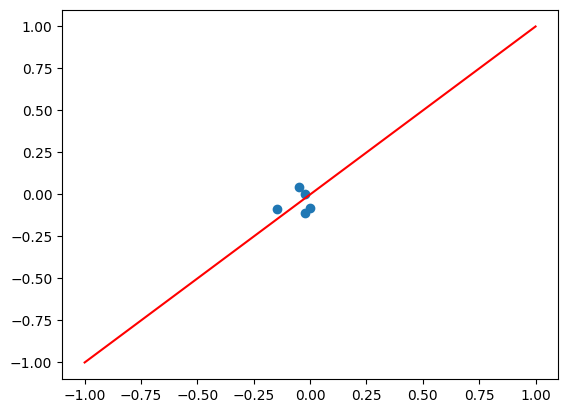

In [65]:
import matplotlib.pyplot as plt

plt.scatter(Betas, Betas_hat)
# 45 degrees line
plt.plot([-1, 1], [-1, 1], color = 'red')

In [66]:
from statsmodels.regression.linear_model import OLS

model = OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.843
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                              209.2
Date:                Thu, 28 Dec 2023   Prob (F-statistic):                    2.51e-76
Time:                        13:13:07   Log-Likelihood:                          174.81
No. Observations:                 200   AIC:                                     -339.6
Df Residuals:                     195   BIC:                                     -323.1
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1126      0.069     -1.641      0.102      -0.248       0.023
x2            -0.0861      0.066     -1.305      0.194      -0.216       0.044
x3             0.0439      0.062      0.712      0.478      -0.078       0.166
x4             0.0010      0.066      0.015      0.988      -0.129       0.131
x5            -0.0780      0.068     -1.147      0.253      -0.212       0.056
==============================================================================
Omnibus:                        0.570   Durbin-Watson:                   2.223
Prob(Omnibus):                  0.752   Jarque-Bera (JB):                0.567
Skew:                           0.127   Prob(JB):                        0.753
Kurtosis:                       2.938   Cond. No.                         24.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# extract betas
OLS_Betas_hat = results.params
np.allclose(Betas_hat, OLS_Betas_hat.reshape(-1,1))

True

In [74]:
np.concatenate([OLS_Betas_hat.reshape(-1,1), Betas_hat], axis = 1)

array([[-0.11262134, -0.11262134],
       [-0.08606052, -0.08606052],
       [ 0.04392412,  0.04392412],
       [ 0.00096943,  0.00096943],
       [-0.07800213, -0.07800213]])